# Linear Regression Explained
![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

## What is Linear Regression?
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable(y) and one or more independent variables(X). In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Linear Regression is one of the most popular algorithms in Machine Learning. That's due to its relative simplicity and well known properties. 

## Simple Linear Regression

Simple linear regression is a linear regression model with only independent variable.

Formula: $ f\left(x\right)=mx+b  $

### Cost Function

We can measure the accuracy of Linear Regression using the <b>Mean Squared Error</b> cost function.

$ Error(m, b) = \frac{1}{N}\sum_{i=1}^{N}(\text{actual output}-\text{predicted output})^2$

Code:

In [1]:
def cost_function(m, b, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i]-(m*x[i]+b))**2
    return totalError/float(len(x))

### Optimization

To find the coefficients that minimize our error function we will use <b>gradient descent</b>. Gradient descent is a optimization algorithm which iteratively takes steps to the local minimum of the cost function. It takes the derivative of our cost function to find the direction to move towards.
![](https://cdn-images-1.medium.com/max/1600/1*f9a162GhpMbiTVTAua_lLQ.png)

Gradient Descent Formula:
$$ \Theta_j:=\Theta_j-\alpha\frac{\partial}{\partial\Theta_j}J\left(\Theta_0,\Theta_1\right) $$

Gradient Descent for Linear Regression: 
$$ \frac{\partial}{\partial m}=\frac{2}{N}\sum_{i=1}^{N}{-x_i(y_i-\left(mx_i+b\right))} $$ 
$$ \frac{\partial}{\partial b}=\frac{2}{N}\sum_{i=1}^{N}{-(y_i-\left(mx_i+b\right))} $$


Code:

In [2]:
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    for j in range(num_iterations):
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        if j%50==0:
            print('error:', cost_function(m, b, x, y))
    return [b, m]

### Running Linear Regression

Creating Dataset

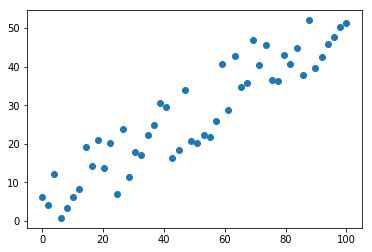

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 100, 50)
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta

plt.scatter(x, y)

In [4]:
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations= 100

print('Initial error:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('error:', cost_function(m, b, x, y))

Initial error: 966.5826025914055
error: 135.31261966939385
error: 36.173218166719245
b: 0.03250995469496849
m: 0.5251541177334634
error: 36.14338151234692


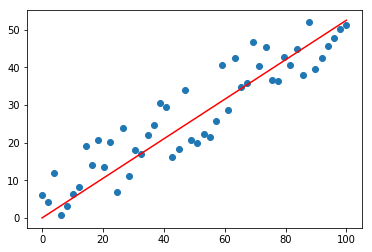

In [5]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

## Multivariate Linear Regression

Linear Regression is called mutlivariate if the data you are working with has 2 or mode independent variables.

Formula: $ f\left(x\right)=b+w_1x_1+w_2x_2+\ldots+w_nx_n=b+\sum_{i=1}^{n}{w_ix}_i $

It works almost the same that simple linear regression. We can use the same error function (the predicted output is different). But now we need to perform gradient descent for each feature.

### Cost Function

In [6]:
def cost_function(x, y, w):
    dif = np.dot(x,w)-y
    cost = np.sum(dif**2) / (2*np.shape(x)[0])
    return dif, cost

### Optimization

In [7]:
def multivariate_gradient_descent(x, y, w, learning_rate, num_iterations):
    for i in range(num_iterations):
        dif, cost = cost_function(x, y, w)
        gradient = np.dot(x.transpose(), dif) / np.shape(x)[0]
        w = w - learning_rate * gradient
        if i%500==0:
            print('error:', cost)
    return w

### Runing Multivariate Linear Regression

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
le = LabelEncoder()
iris['label'] = le.fit_transform(iris['label'])
X = np.array(iris.drop(['petal_width'], axis=1))
y = np.array(iris['petal_width'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
learning_rate = 0.0001
num_iterations= 10000
_, num_features = np.shape(X)
initial_weights = np.zeros(num_features)
weights = multivariate_gradient_descent(X, y, initial_weights, learning_rate, num_iterations)
print(weights)
dif, cost = cost_function(X, y, weights)
print('error: ', cost)

error: 1.0076666666666665
error: 0.12102174349377567
error: 0.09967414562782184
error: 0.0840548621716564
error: 0.07150567190072649
error: 0.06141856309149354
error: 0.05330866819397273
error: 0.04678662713897808
error: 0.041539768472679095
error: 0.03731700458789666
error: 0.03391670204017557
error: 0.031176940952850778
error: 0.028967692950894228
error: 0.02718453974592935
error: 0.025743628922400785
error: 0.024577623243061494
error: 0.023632447788047132
error: 0.022864677784494795
error: 0.022239440934899254
error: 0.021728732907413856
[ 0.02954413 -0.0726195   0.29250703  0.16076298]
error:  0.021310064610819517


## Resources

<ul>
    <li><a href="https://en.wikipedia.org/wiki/Linear_regression">Linear Regression (Wikipedia)</a></li>
    <li><a href="https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9">Simple and Multiple Linear Regression in Python (Adi Bronshtein on Medium)</a></li>
    <li><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Linear Regression (Scikit Learn Documentation)</a></li>
</ul>

## Conclusion

That was my explanation of Linear Regression. 
I hope you liked this tutorial if you did consider subscribing on my <a href="https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA">Youtube Channel</a> or following me on Social Media. If you have any question feel free to contact me.